In [2]:
import pandas as pd
from numpy import *
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import cv2
import numpy as np
from keras.models import model_from_json
from keras.preprocessing import image
from sklearn import preprocessing
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics

from sklearn.model_selection import train_test_split
from sklearn import neighbors

data =pd.read_csv('/Users/kurukundasreenathreddy/Desktop/Major project/data/train.csv')
array = data.values

for i in range(len(array)):
	if array[i][0]=="Male":
		array[i][0]=1
	else:
		array[i][0]=0


df=pd.DataFrame(array)

maindf =df[[0,1,2,3,4,5,6]]
mainarray=maindf.values
print (mainarray)


temp=df[7]
train_y =temp.values
# print(train_y)
# print(mainarray)
train_y=temp.values

for i in range(len(train_y)):
	train_y[i] =str(train_y[i])



mul_lr = linear_model.LogisticRegression(multi_class='multinomial', solver='newton-cg',max_iter =1000)
mul_lr.fit(mainarray, train_y)

testdata =pd.read_csv('/Users/kurukundasreenathreddy/Desktop/Major project/data/test.csv')
test = testdata.values

for i in range(len(test)):
	if test[i][0]=="Male":
		test[i][0]=1
	else:
		test[i][0]=0



[[1 17 7 ... 7 3 2]
 [1 19 4 ... 4 6 6]
 [0 18 7 ... 4 5 5]
 ...
 [1 22 5 ... 3 6 1]
 [1 19 5 ... 5 7 5]
 [0 18 5 ... 7 6 5]]


In [3]:
data

,Gender,Age,openness,neuroticism,conscientiousness,agreeableness,extraversion,Personality (Class label)
0,Male,17,7,4,7,3,2,extraverted
1,Male,19,4,5,4,6,6,serious
2,Female,18,7,6,4,5,5,dependable
3,Female,22,5,6,7,4,3,extraverted
4,Female,19,7,4,6,5,4,lively
...,...,...,...,...,...,...,...,...
704,Female,20,4,5,6,6,1,responsible
705,Male,18,6,3,1,5,5,dependable
706,Male,22,5,2,3,6,1,serious
707,Male,19,5,6,5,7,5,extraverted


In [4]:
data.describe()

,Age,openness,neuroticism,conscientiousness,agreeableness,extraversion
count,709.000000,709.000000,709.000000,709.000000,709.000000,709.000000
mean,19.685472,5.019746,4.647391,4.643159,4.827927,4.409027
std,2.510672,1.519052,1.658673,1.703569,1.632564,1.567404
min,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,18.000000,4.000000,4.000000,3.000000,4.000000,3.000000
50%,19.000000,5.000000,5.000000,5.000000,5.000000,5.000000
75%,21.000000,6.000000,6.000000,6.000000,6.000000,6.000000
max,28.000000,8.000000,8.000000,8.000000,8.000000,7.000000


In [5]:
data.isnull

<bound method DataFrame.isnull of      Gender  Age  openness  neuroticism  conscientiousness  agreeableness  \
0      Male   17         7            4                  7              3   
1      Male   19         4            5                  4              6   
2    Female   18         7            6                  4              5   
3    Female   22         5            6                  7              4   
4    Female   19         7            4                  6              5   
..      ...  ...       ...          ...                ...            ...   
704  Female   20         4            5                  6              6   
705    Male   18         6            3                  1              5   
706    Male   22         5            2                  3              6   
707    Male   19         5            6                  5              7   
708  Female   18         5            5                  7              6   

     extraversion Personality (Class labe

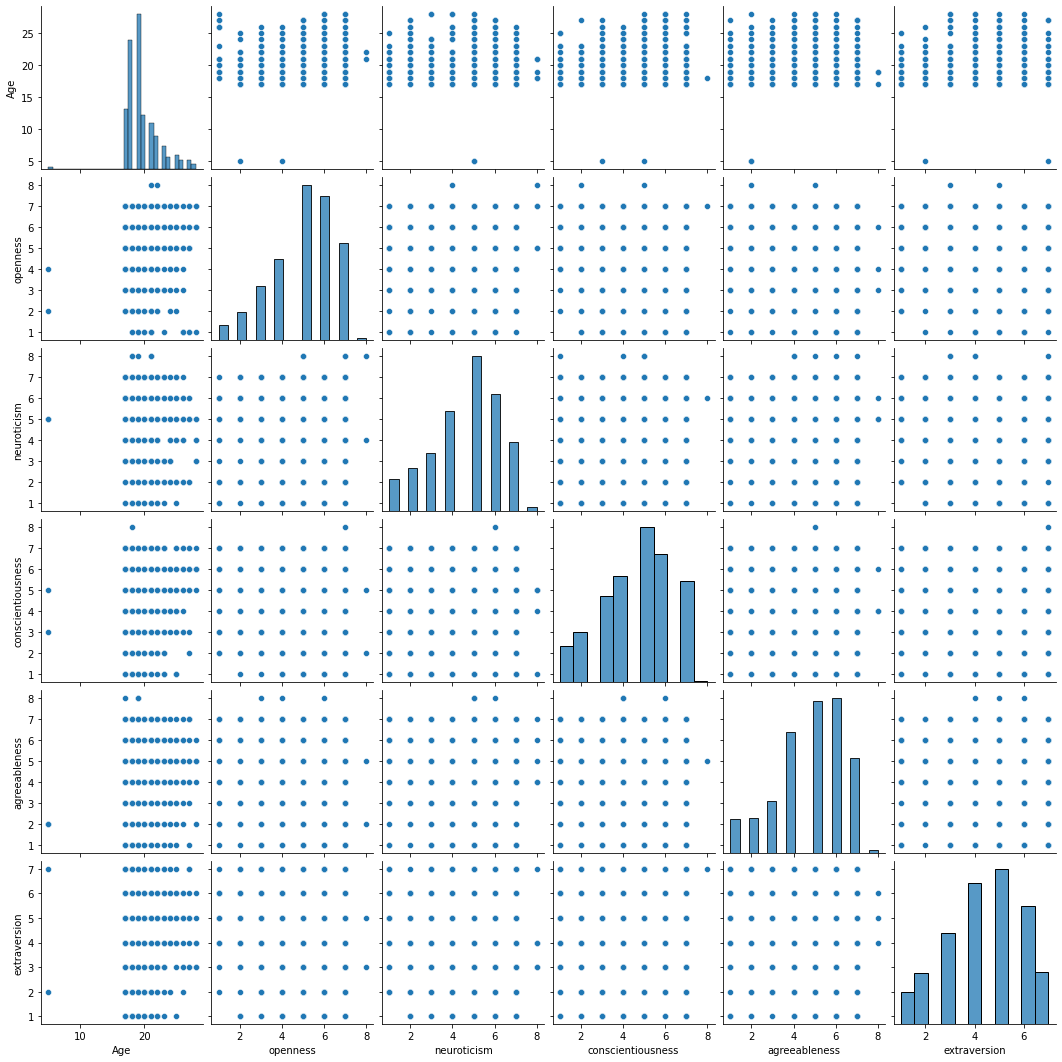

In [6]:
sns.pairplot(data)

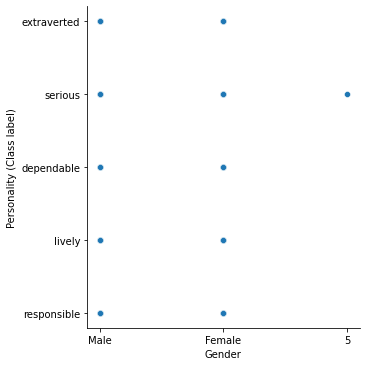

In [7]:
sns.relplot(x="Gender",y="Personality (Class label)",data=data)

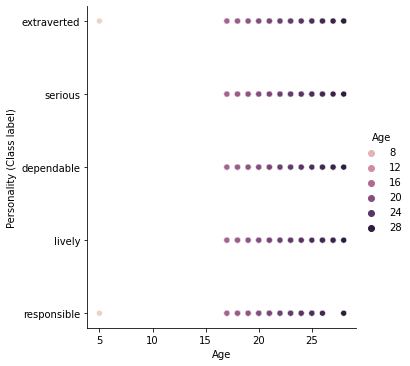

In [8]:
sns.relplot(x="Age",y="Personality (Class label)",hue="Age",data=data)

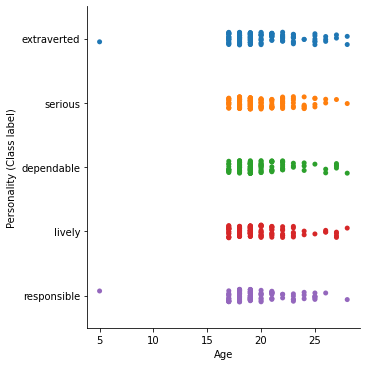

In [9]:
sns.catplot(x="Age",y="Personality (Class label)",data=data)

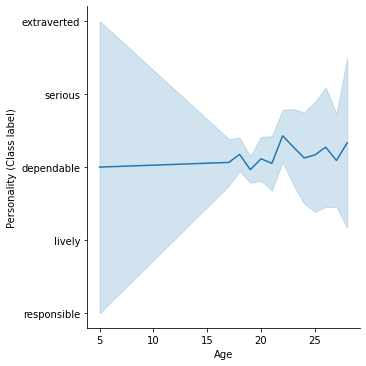

In [10]:
sns.relplot(x="Age",y="Personality (Class label)", kind="line",data=data)

In [11]:
data["Age"].value_counts()

19    200
18    167
17     78
20     70
21     59
22     42
23     29
25     18
24     16
27     11
26     11
28      6
5       2
Name: Age, dtype: int64

In [12]:
df1=pd.DataFrame(test)

testdf =df1[[0,1,2,3,4,5,6]]
maintestarray=testdf.values
print(maintestarray)

y_pred = mul_lr.predict(maintestarray)
for i in range(len(y_pred)) :
	y_pred[i]=str((y_pred[i]))
DF = pd.DataFrame(y_pred,columns=['Predicted Personality'])
DF.index=DF.index+1
DF.index.names = ['Serial Number']
DF.to_csv("output.csv")

[[0 20 7 ... 9 5 5]
 [1 17 5 ... 5 2 4]
 [0 25 5 ... 7 2 4]
 ...
 [1 18 7 ... 6 2 7]
 [1 23 6 ... 5 4 3]
 [0 18 5 ... 3 5 6]]


/Users/kurukundasreenathreddy/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

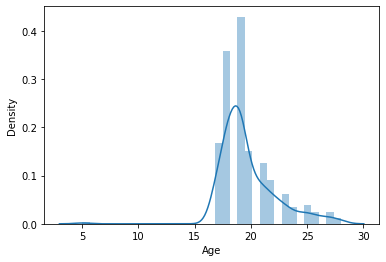

In [13]:
sns.distplot(data.Age,kde=True)

<AxesSubplot:xlabel='Age', ylabel='Personality (Class label)'>

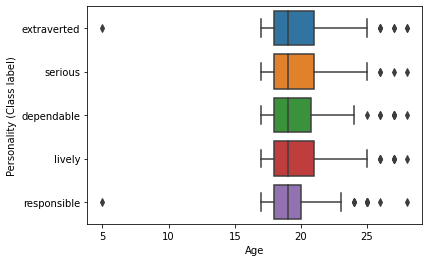

In [14]:
sns.boxplot(x='Age',y='Personality (Class label)',data=data)

<AxesSubplot:>

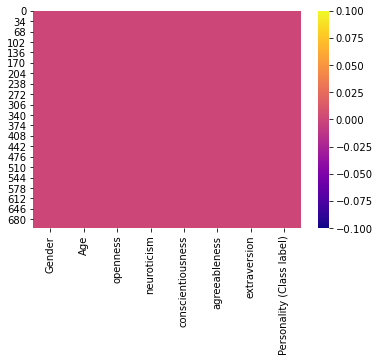

In [15]:
sns.heatmap(data.isnull(), cmap='plasma') 

<AxesSubplot:xlabel='Age', ylabel='count'>

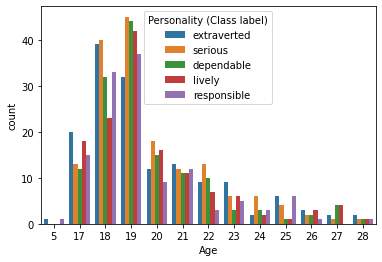

In [16]:
sns.countplot(x='Age',hue='Personality (Class label)',data=data)

<AxesSubplot:xlabel='Age', ylabel='count'>

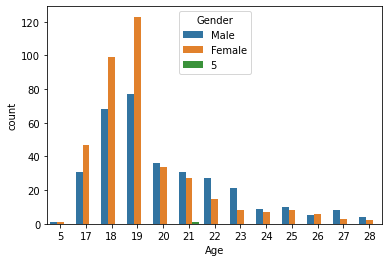

In [17]:
sns.countplot(x='Age',hue='Gender',data=data)

In [18]:
photo="Demo1.jpg"
im = cv2.imread(photo)

im = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)

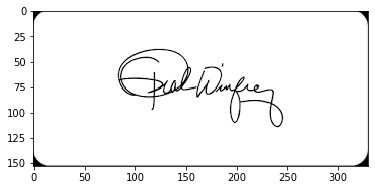

In [19]:
plt.imshow(im, interpolation='nearest',cmap='gray')

In [20]:
im = cv2.GaussianBlur(im, (5, 5), 0)

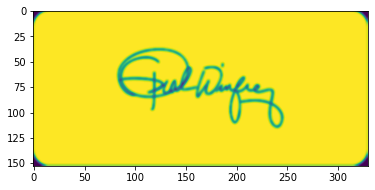

In [21]:
plt.imshow(im)

In [22]:
im_th = cv2.adaptiveThreshold(im, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 115, 1)

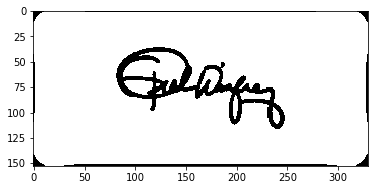

In [23]:
plt.imshow(im_th,interpolation='nearest',cmap='gray')

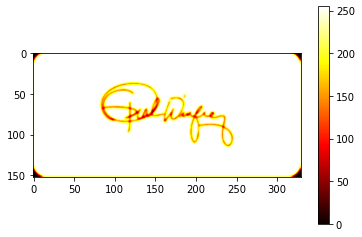

In [24]:
plt.imshow(im,cmap='hot')
plt.colorbar()

In [25]:
import tkinter as tk
from tkinter import *
from PIL import ImageTk,Image

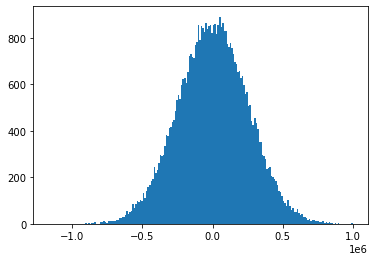

In [29]:
root = Tk()
root.title("Personality Detection")
root.geometry("400x200")

def graph():
    Personality_detection = np .random.normal(2000,250000,50000)
    plt.hist(Personality_detection,200)
    plt.show()

my_button = Button(root,text = "Graph",command = graph)

my_button.pack()
    
root.mainloop()

    

In [27]:
class Win1:
    def __init__(self, master):
        self.master = master
        self.master.geometry("400x300")
        self.show_widgets()
 
    def show_widgets(self):
        self.frame = tk.Frame(self.master)
        self.master.title("Window n.1")
        self.create_button("Click to open Window 2", Win2)
        self.create_button("Click to open Window 3", Win3)
        self.create_button("Click to open Window 4", Win4)
        self.frame.pack()
 
    def create_button(self, text, _class):
        "Button that creates a new window"
        tk.Button(
            self.frame, text=text,
            command=lambda: self.new_window(_class)).pack()
 
    def new_window(self, _class):
            global win2, win3 , win4
 
            try:
                if _class == Win2:
                    if win2.state() == "normal":
                        win2.focus()
            except:  
                win2 = tk.Toplevel(self.master)
                _class(win2)
 
            try:
                if _class == Win3:
                    if win3.state() == "normal":
                        win3.focus()
            except:  
                win3 = tk.Toplevel(self.master)
                _class(win3)
                
            try:
                if _class == Win4:
                    if win4.state() == "normal":
                        win4.focus()
            except:  
                win4 = tk.Toplevel(self.master)
                _class(win4)
 
    def close_window(self):
        self.master.destroy()
 
class Win2(Win1):
 
    def show_widgets(self):
        self.master.title("Window 2")
        self.frame = tk.Frame(self.master, bg="red")
        self.quit_button = tk.Button(
            self.frame, text=f"Quit this window n. 2",
            command=self.close_window)
        self.quit_button.pack()
        self.create_button("Open window 3 from window 2", Win3)
        self.frame.pack()
        self.label = tk.Label(
            self.frame, text="THIS IS ONLY IN THE THIRD WINDOW")
 
class Win3(Win2):
 
    def show_widgets(self):
        self.master.title("Window 3")
        self.frame = tk.Frame(self.master, bg="green")
        self.quit_button = tk.Button(
            self.frame, text=f"Quit this window n. 3",
            command=self.close_window)
        self.label = tk.Label(
            self.frame, text="1)50-0= Extraversion\n      2)100-50 = Agreeableness\n   3)150-100=Conscientiousness\n4)200-150=Neuroticism\n5)250-200=Openness")
        self.label.pack()
        self.frame.pack()
        
class Win4(Win3):
 
    def show_widgets(self):
        self.master.title("Window 4")
        self.frame = tk.Frame(self.master, bg="green")
        self.quit_button = tk.Button(
            self.frame, text=f"Quit this window n. 4",
            command=self.close_window)
        self.label = tk.Label(
            self.frame, text="1)Openness to experience is one of the domains which are used to describe human personality in the Five Factor Model. Openness involves six facets, or dimensions: active imagination, aesthetic sensitivity, attentiveness to inner feelings, preference for variety, intellectual\ncuriosity, and challenging authority.\n 2)Neuroticism is the trait disposition to experience negative affects, including anger, anxiety, self‐consciousness, irritability, emotional instability, and depression")
        self.label.pack()
        self.frame.pack()
 
root = tk.Tk()
app = Win1(root)
root.mainloop()

In [ ]:
cv2.namedWindow("Resulting Image with Rectangular ", cv2.WINDOW_NORMAL)
cv2.imshow("Resulting Image  ", im)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [28]:
hist

hist
import pandas as pd
from numpy import *
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import cv2
import numpy as np
from keras.models import model_from_json
from keras.preprocessing import image
from sklearn import preprocessing
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics

from sklearn.model_selection import train_test_split
from sklearn import neighbors

data =pd.read_csv('/Users/kurukundasreenathreddy/Desktop/Major project/data/train.csv')
array = data.values

for i in range(len(array)):
    if array[i][0]=="Male":
        array[i][0]=1
    else:
        array[i][0]=0


df=pd.DataFrame(array)

maindf =df[[0,1,2,3,4,5,6]]
mainarray=maindf.values
print (mainarray)


temp=df[7]
train_y =temp.values
# print(train_y)
# print(mainarray)
train_y=temp.values

for i in range(len(train_y)):
    train_y[i] =str(train_y[i])



mul_lr = linear_model.LogisticRegression(mult